In [6]:
%matplotlib inline
# Importando as libraries necessárias
from qiskit import execute, BasicAer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.tools.visualization import plot_histogram, circuit_drawer

provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-07-30 20:21:07,330: Credentials are already in use. The existing account in the session will be replaced.


# Praticando - Enlace quântico

Para demonstrarmos o enlace quântico, usaremos 2 bits clássicos e 2 bits quânticos em um circuito quântico - este código pode ser executado tanto em um simulador ou em um computador quântico em um laboratório da IBM, por exemplo!

Neste exercício, usaremos o QASM Simulator (ferramenta de simulação quântica que é executada no backend do Qiskit (se lê _quiskit_ )

In [7]:
backend = BasicAer.get_backend('qasm_simulator')

In [8]:
# Inicializando o circuito
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

# Portas quânticas
Assim como na computação clássica nós temos as portas lógicas (AND, OR, etc.), em circuitos em computação quântica também são empregadas portas para a realização de operações. Como não é o intuito desse exercício o de explicar sobre o funcionamento das portas quânticas, o que seria consideravelmente moroso nesse momento, apenas explico superficialmente que aqui serão empregadas duas portas quânticas: *Hadamard* e *CNOT*.

A primeira coloca um qubit em superposição, e a segunda servirá para demonstrar como se comportam dois qubits em enlace quântico.

In [9]:
# Porta Hadamard no bit q[0]
qc.h(q[0])

# CNOT com bit controle q[0] e bit alvo q[1]
qc.cx(q[0], q[1])

# Medição do circuito
qc.measure(q, c)

# Execução do circuito qc usando o simulador, para 2^10 'disparos'
exec_circuito = execute(qc, backend=backend, shots=1024)

# Visualizando os resultados
Vamos agora observar a probabilidade dos estados 00 e 11:

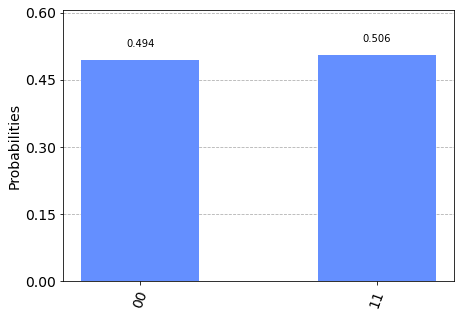

In [10]:
plot_histogram(exec_circuito.result().get_counts(qc))

# Visualizando o circuito
Também é possível visualizar a representação gráfica de como funcionaria o circuito:

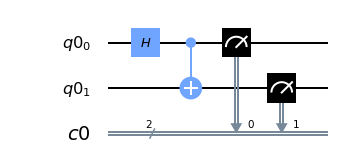

In [11]:
qc.draw()